Descriptive Inference II

In [1]:
# Clear Global Environment
rm(list = ls())

getwd()
setwd("/Users/Lingyi/TAD/TextDataAnalysis")

[1] "/Users/Lingyi/TAD/TextDataAnalysis"

In [2]:
set.seed("1234")

In [3]:
# 1 Loading packages
library(quanteda)
library(quanteda.corpora)
library(boot)
library(dplyr)

quanteda version 1.0.0
Using 3 of 4 threads for parallel computing

Attaching package: ‘quanteda’

The following object is masked from ‘jupyter:irkernel’:

    View

The following object is masked from ‘package:utils’:

    View


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
# 2 Load in data: Irish budget proposals from 2008-2012
data("data_corpus_irishbudgets")

irish_budget_texts <- texts(data_corpus_irishbudgets)

In [5]:
# 3 Lexical diversity measures

# 3.1 TTR 
budget_tokens <- tokens(irish_budget_texts, remove_punct = TRUE) 

In [6]:
# Num tokens per document
num_tokens <- lengths(budget_tokens)

num_types <- ntype(budget_tokens)

irish_budget_TTR <- num_types / num_tokens

In [ ]:
View(irish_budget_TTR)

In [ ]:
head(budget_tokens)

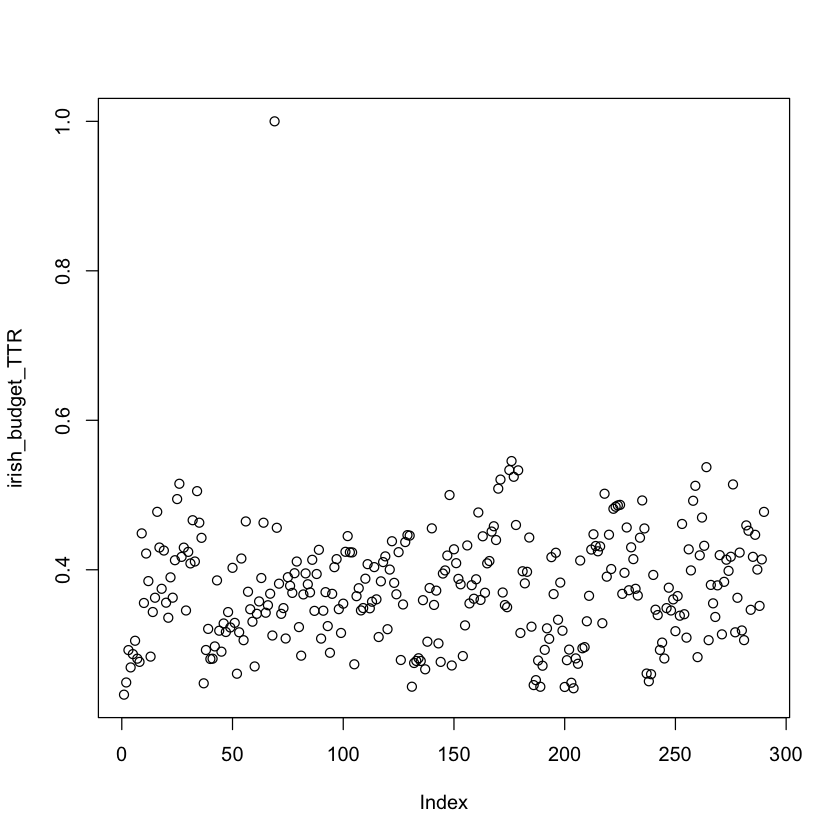

In [8]:
# Would you expect the budgets to become more or less complex over time
plot(irish_budget_TTR)

In [9]:
# 3.2 Mean per-document TTR scores by year, party

aggregate(irish_budget_TTR, by = list(data_corpus_irishbudgets[["year"]]$year), FUN = mean)

aggregate(irish_budget_TTR, by = list(data_corpus_irishbudgets[["party"]]$party), FUN = mean)

Group.1,x
2008,0.3800614
2009,0.3751939
2010,0.3182460
2011,0.3864795
2012,0.3772739


Group.1,x
FF,0.3518076
FG,0.3845090
Green,0.3490808
Indp,0.4245113
LAB,0.3952753
PBPA,0.3465940
SF,0.3658587
SOC,0.3760043
WUAG,0.4320988


In [10]:
# 3.3 Calculate TTR score by year, party 
textstat_lexdiv(dfm(data_corpus_irishbudgets, groups = "year", remove_punct = TRUE, verbose = TRUE), measure = "TTR")

Creating a dfm from a corpus input...
   ... lowercasing
   ... found 290 documents, 17,446 features
   ... grouping texts
   ... created a 5 x 17,446 sparse dfm
   ... complete. 
Elapsed time: 0.962 seconds.


document,TTR
2008,0.08291970
2009,0.04189502
2010,0.10318802
2011,0.08514497
2012,0.07270285


In [11]:
# Sidebar: using the "groups" parameter is how to group documents by a covariate

textstat_lexdiv(dfm(data_corpus_irishbudgets, groups = "party", remove_punct = TRUE, verbose = TRUE), measure = "TTR")

Creating a dfm from a corpus input...
   ... lowercasing
   ... found 290 documents, 17,446 features
   ... grouping texts
   ... created a 9 x 17,446 sparse dfm
   ... complete. 
Elapsed time: 0.731 seconds.


document,TTR
FF,0.04703310
FG,0.05367769
Green,0.11707360
Indp,0.18455887
LAB,0.08197836
PBPA,0.32970027
SF,0.09361702
SOC,0.36100696
WUAG,0.41604938


In [12]:
# 4 Readability measure

# 4.1 FRE
textstat_readability(data_corpus_irishbudgets, "Flesch")

textstat_readability(texts(data_corpus_irishbudgets, groups = "year"), "Flesch")

textstat_readability(texts(data_corpus_irishbudgets, groups = "party"), "Flesch")

document,Flesch
2008_BUDGET_01_Brian_Cowen_FF,43.14908
2008_BUDGET_02_Richard_Bruton_FG,62.86128
2008_BUDGET_03_Joan_Burton_LAB,56.59059
2008_BUDGET_04_Arthur_Morgan_SF,46.56433
2008_BUDGET_05_Bertie_Ahern_FF,43.87047
2008_BUDGET_06_Enda_Kenny_FG,50.13147
2008_BUDGET_07_Eamon_Gilmore_LAB,49.13217
2008_BUDGET_08_John_Gormley_Green,40.04577
2008_BUDGET_09_Batt_OKeeffe_FF,25.61999
2008_BUDGET_10_Phil_Hogan_FG,47.36727


document,Flesch
2008,49.93396
2009,52.23742
2010,55.59374
2011,53.35879
2012,51.90753


document,Flesch
FF,47.59776
FG,55.62858
Green,44.49414
Indp,58.30884
LAB,55.65035
PBPA,59.66026
SF,55.32752
SOC,38.61326
WUAG,62.35832


In [13]:
# 4.2 Dale-Chall measure

textstat_readability(data_corpus_irishbudgets, "Dale.Chall")

textstat_readability(texts(data_corpus_irishbudgets, groups = "year"), "Dale.Chall")

textstat_readability(texts(data_corpus_irishbudgets, groups = "party"), "Dale.Chall")

document,Dale.Chall
2008_BUDGET_01_Brian_Cowen_FF,-47.12741
2008_BUDGET_02_Richard_Bruton_FG,-43.35146
2008_BUDGET_03_Joan_Burton_LAB,-44.18588
2008_BUDGET_04_Arthur_Morgan_SF,-47.04315
2008_BUDGET_05_Bertie_Ahern_FF,-47.82764
2008_BUDGET_06_Enda_Kenny_FG,-46.44747
2008_BUDGET_07_Eamon_Gilmore_LAB,-46.50558
2008_BUDGET_08_John_Gormley_Green,-46.71269
2008_BUDGET_09_Batt_OKeeffe_FF,-51.34120
2008_BUDGET_10_Phil_Hogan_FG,-48.05119


document,Dale.Chall
2008,-45.91169
2009,-45.35477
2010,-45.11405
2011,-45.73213
2012,-45.70685


document,Dale.Chall
FF,-46.11449
FG,-45.05252
Green,-46.51167
Indp,-44.08381
LAB,-45.33743
PBPA,-45.81093
SF,-45.07514
SOC,-50.92508
WUAG,-42.77313


In [14]:
# 4.3 let's compare each measure

all_readability_measures <- textstat_readability(data_corpus_irishbudgets, c("Flesch", "Dale.Chall", "SMOG", "Coleman.Liau", "Fucks"))

readability_matrix <- cbind(all_readability_measures$Flesch, all_readability_measures$Dale.Chall, all_readability_measures$Coleman.Liau, all_readability_measures$Fucks)

cor(readability_matrix)

1.0000000,0.7813937,0.9595095,-0.8946848
0.7813937,1.0000000,0.6502695,-0.9733723
0.9595095,0.6502695,1.0000000,-0.8025731
-0.8946848,-0.9733723,-0.8025731,1.0000000


In [15]:
# 5 Bootstrapping

# data prep: remove smaller parties so we're left with the 6 largest
iebudgetsCorpSub <- corpus_subset(data_corpus_irishbudgets, !(party %in% c("WUAG", "SOC", "PBPA" )))

# convert corpus to df for stratified sampling
iebudgets_df <- data.frame(texts = iebudgetsCorpSub[["texts"]]$texts, 
                 party = iebudgetsCorpSub[["party"]]$party,
                 year = as.numeric(iebudgetsCorpSub[["year"]]$year),
                 stringsAsFactors = FALSE)

# Let's filter out the parties with only one speech
iebudgets_df <- na.omit(filter(iebudgets_df, party != "WUAG", party != "SOC", party != "PBPA"))

In [16]:
# We will use a loop to bootstrap the text and calculate standard errors

iters <- 10

iebudgets_df <- data.frame(texts = iebudgetsCorpSub[["texts"]]$texts, 
                           party = iebudgetsCorpSub[["party"]]$party,
                           year = as.numeric(iebudgetsCorpSub[["year"]]$year),
                           stringsAsFactors = FALSE)

In [17]:
# Let's filter out the parties with only one speech
iebudgets_df <- na.omit(filter(iebudgets_df, party != "WUAG", party != "SOC", party != "PBPA"))

In [18]:
# initialize data frames to store results
party_FRE <- data.frame(matrix(ncol = length(unique(iebudgets_df$party)), nrow = iters))
colnames(party_FRE) <- names(table(iebudgets_df$party))

In [19]:
# run the bootstrap

for(i in 1:iters) {
  
  iebudgets_grouped <- group_by(iebudgets_df, party)
  
  # take a sample of 20 documents per level (party)
  bootstrap_sample <- sample_n(iebudgets_grouped, 20, replace = TRUE)
  
  readability_results <- textstat_readability(bootstrap_sample$texts, measure = "Flesch")
  
  #store results
  
  readability_grouped <- group_by(readability_results, bootstrap_sample$party)
  readability_means <- summarize(readability_grouped, mean(Flesch))
  
  party_FRE[i, ] <- t(readability_means[, 2])
  
}

In [20]:
# Define the standard error function
std <- function(x) sd(x)/sqrt(length(x))

In [21]:
# Calculate standard errors and point estimates

party_ses <- apply(party_FRE, 2, std)

party_means <- apply(party_FRE, 2, mean)

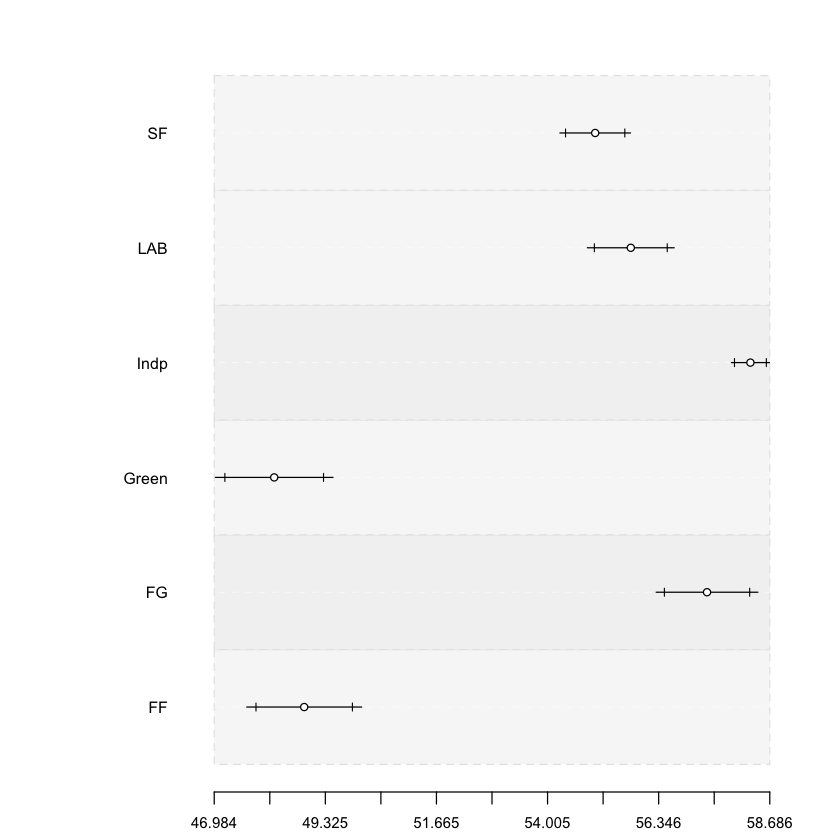

In [22]:
# Plot results--party

coefs<-party_means
ses<-party_ses

y.axis <- c(1:6)
min <- min(coefs - 2*ses)
max <- max(coefs + 2*ses)
var.names <- colnames(party_FRE)
adjust <- 0
par(mar=c(2,8,2,2))

plot(coefs, y.axis, type = "p", axes = F, xlab = "", ylab = "", pch = 19, cex = .8, 
     xlim=c(min,max),ylim = c(.5,6.5), main = "")
rect(min,.5,max,1.5, col = c("grey97"), border="grey90", lty = 2)
rect(min,1.5,max,2.5, col = c("grey95"), border="grey90", lty = 2)
rect(min,2.5,max,3.5, col = c("grey97"), border="grey90", lty = 2)
rect(min,3.5,max,4.5, col = c("grey95"), border="grey90", lty = 2)
rect(min,4.5,max,5.5, col = c("grey97"), border="grey90", lty = 2)
rect(min,5.5,max,6.5, col = c("grey97"), border="grey90", lty = 2)

axis(1, at = seq(min,max,(max-min)/10), 
     labels = c(round(min+0*((max-min)/10),3),
                round(min+1*((max-min)/10),3),
                round(min+2*((max-min)/10),3),
                round(min+3*((max-min)/10),3),
                round(min+4*((max-min)/10),3),
                round(min+5*((max-min)/10),3),
                round(min+6*((max-min)/10),3),
                round(min+7*((max-min)/10),3),
                round(min+8*((max-min)/10),3),
                round(min+9*((max-min)/10),3),
                round(max,3)),tick = T,cex.axis = .75, mgp = c(2,.7,0))
axis(2, at = y.axis, label = var.names, las = 1, tick = FALSE, cex.axis =.8)
abline(h = y.axis, lty = 2, lwd = .5, col = "white")
segments(coefs-qnorm(.975)*ses, y.axis+2*adjust, coefs+qnorm(.975)*ses, y.axis+2*adjust, lwd =  1)

segments(coefs-qnorm(.95)*ses, y.axis+2*adjust-.035, coefs-qnorm(.95)*ses, y.axis+2*adjust+.035, lwd = .9)
segments(coefs+qnorm(.95)*ses, y.axis+2*adjust-.035, coefs+qnorm(.95)*ses, y.axis+2*adjust+.035, lwd = .9)
points(coefs, y.axis+2*adjust,pch=21,cex=.8, bg="white")

In [23]:
# Compare with calculating the per-party mean Flesch statistic

summarize(
          group_by(
                  textstat_readability(iebudgets_df$texts, measure = "Flesch"),
                  iebudgets_df$party
          ),
          mean(Flesch)
)

iebudgets_df$party,mean(Flesch)
FF,47.19133
FG,55.99575
Green,47.44314
Indp,57.18709
LAB,55.57541
SF,54.56967
